In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

import warnings
warnings.filterwarnings('ignore')

from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../Data/Miles_Traveled.csv')

In [3]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [4]:
df.columns = ['ds', 'y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


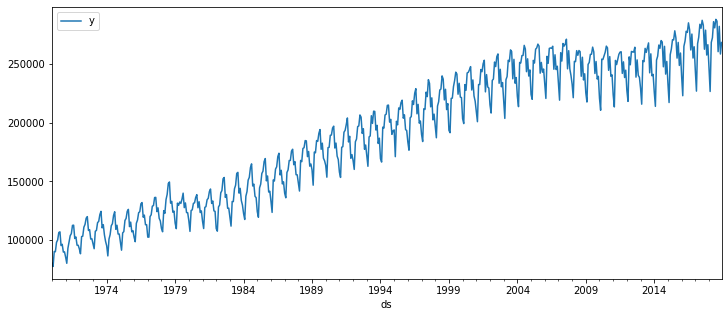

In [12]:
df.plot(x='ds', y='y');

In [9]:
# Train test split

In [8]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [10]:
# model

In [13]:
m = Prophet().fit(train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(12, freq='MS')

In [15]:
forecast = m.predict(future)

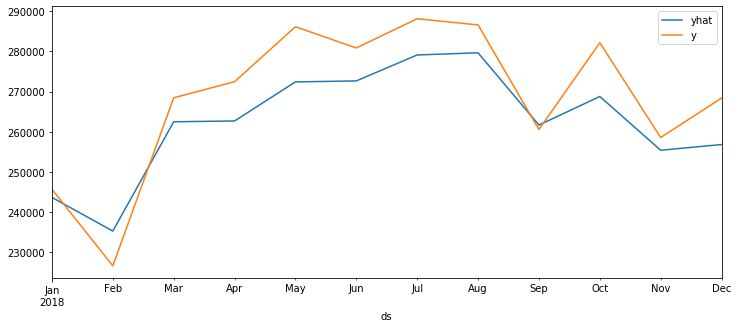

In [36]:
ax = forecast.iloc[-12:].plot('ds', 'yhat')
test.plot('ds','y', ax=ax);


In [37]:
from statsmodels.tools.eval_measures import rmse

In [38]:
rmse(test['y'], forecast.iloc[-12:]['yhat'])

8750.25052083061

In [39]:
test.mean()

y    268739.666667
dtype: float64

In [41]:
# Prophet Diagnostics

In [40]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [60]:
# Initial 5 years training period
initial = str(365 *5) + ' days'
# Fold every 5 years
periods = str(365 * 5) + ' days'
# Forecast 1 year into the future
horizon = str(365 * 1) + ' days'

In [61]:
df_cv = cross_validation(m, horizon, periods, initial)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [63]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087389,106951.575304,109855.069865,102445.0,1976-12-11
1,1977-02-01,102996.111525,101526.059789,104468.721391,102416.0,1976-12-11
2,1977-03-01,118973.318113,117425.371697,120489.956318,119960.0,1976-12-11
3,1977-04-01,120612.923709,119163.475458,122083.474065,121513.0,1976-12-11
4,1977-05-01,127883.031830,126482.017068,129290.898780,128884.0,1976-12-11


In [65]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273328.467970,267794.454532,279433.370421,283184.0,2016-12-01
104,2017-09-01,255447.843997,249633.788045,261059.247785,262673.0,2016-12-01
105,2017-10-01,262552.901413,256822.876245,268300.039747,278937.0,2016-12-01
106,2017-11-01,249204.331440,243572.728860,255162.209914,257712.0,2016-12-01
107,2017-12-01,250450.721819,245110.758191,256216.972908,266535.0,2016-12-01


In [66]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.437359e+07,4936.961190,4528.637861,0.027750,0.023384,0.3
1,53 days,2.187095e+07,4676.638408,4262.628303,0.024999,0.023384,0.3
2,54 days,1.842045e+07,4291.904691,3732.310696,0.020061,0.022021,0.4
3,55 days,2.351247e+07,4848.965429,4271.125183,0.023241,0.023384,0.3
4,57 days,2.115130e+07,4599.053997,3989.900860,0.021416,0.022021,0.4
...,...,...,...,...,...,...,...
94,360 days,1.862165e+07,4315.281433,3775.153749,0.019707,0.019425,0.5
95,361 days,1.777184e+07,4215.666214,3507.111932,0.018367,0.018879,0.5
96,362 days,3.210247e+07,5665.904399,4435.117794,0.022175,0.024755,0.4
97,364 days,3.022906e+07,5498.095592,4257.907114,0.021507,0.021415,0.5


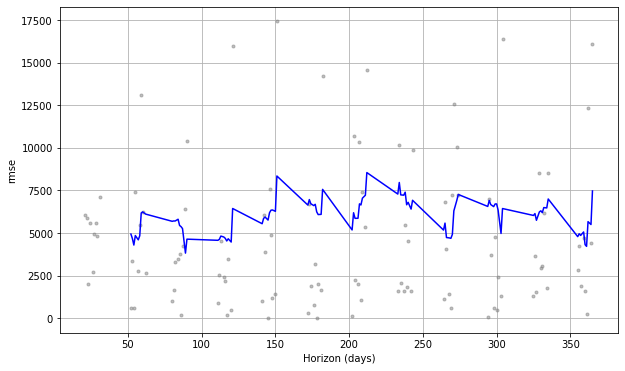

In [67]:
plot_cross_validation_metric(df_cv, metric='rmse');